# RAG 아키텍쳐와 프로세스

1. 질문 처리

    질문 처리 단계에서는 사용자의 질문을 받아 이를 처리하고, 관련 데이터를 찾는 작업이 이루어집니다. 이를 위해 다음과 같은 구성 요소들이 필요합니다:

    - 데이터 소스 연결: 질문에 대한 답변을 찾기 위해 다양한 텍스트 데이터 소스에 연결해야 합니다. LangChain은 다양한 데이터 소스와의 연결을 간편하게 설정할 수 있도록 돕습니다.

    - 데이터 인덱싱 및 검색: 데이터 소스에서 관련 정보를 효율적으로 찾기 위해, 데이터는 인덱싱되어야 합니다. LangChain은 인덱싱 과정을 자동화하고, 사용자의 질문과 관련된 데이터를 검색하는 데 필요한 도구를 제공합니다.

2. 답변 생성

    관련 데이터를 찾은 후에는 이를 기반으로 사용자의 질문에 답변을 생성해야 합니다. 이 단계에서는 다음 구성 요소가 중요합니다:

    - 답변 생성 모델: LangChain은 고급 자연어 처리(NLP) 모델을 사용하여 검색된 데이터로부터 답변을 생성할 수 있는 기능을 제공합니다. 이러한 모델은 사용자의 질문과 검색된 데이터를 입력으로 받아, 적절한 답변을 생성합니다.

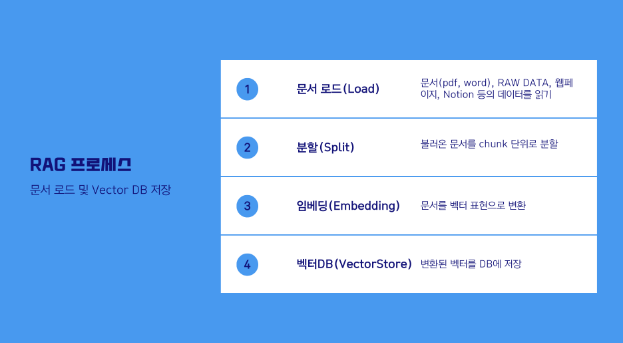

## 인덱싱

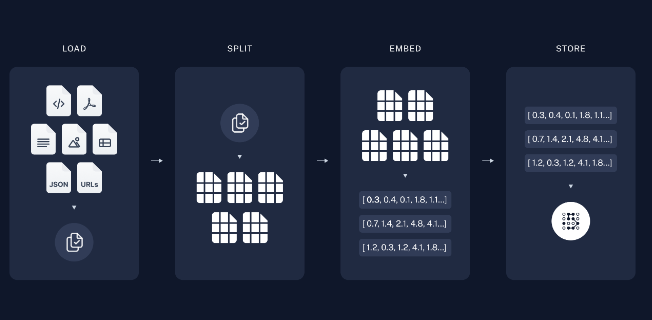

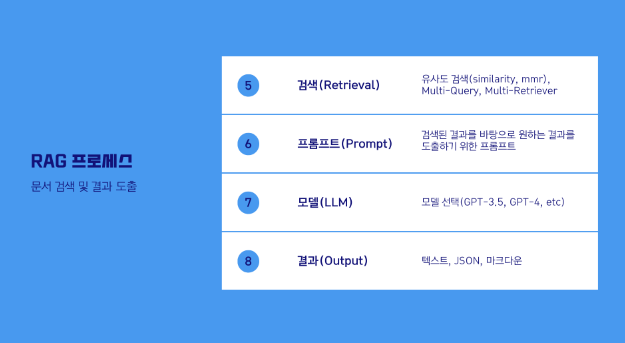

## 검색 및 생성

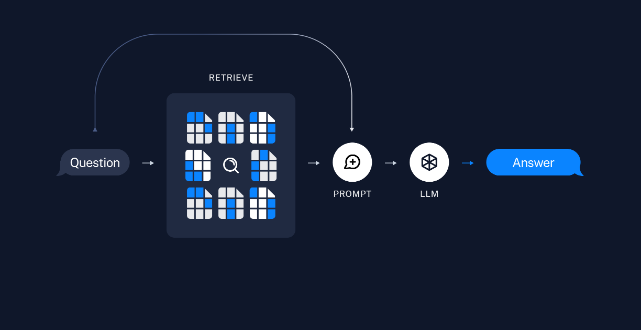

# LangSmith API Key 로드

In [ ]:
# # API KEY를 환경변수로 관리하기 위한 설정 파일
# from dotenv import load_dotenv

# # API KEY 정보로드
# load_dotenv()

# Langsmith로 프로젝트 추적 설정

In [ ]:
# import os

# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_PROJECT"] = "RAG_Overview"

# 데이터 로드

webbaseloader, pdf, csv, txt, python

## PDF

다음은 폴더내 모든 .pdf 파일을 로드하는 예제입니다.

In [26]:
from langchain_community.document_loaders.pdf import PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader(".", glob="data/*.pdf")
docs = loader.load()

print(f"문서의 수: {len(docs)}\n")
print("[메타데이터]\n")
print(docs[0].metadata)
print("\n========= [앞부분] 미리보기 =========\n")
print(docs[0].page_content[100:200])


문서의 수: 376

[메타데이터]

{'source': 'data\\074fdb6e-기후위기-식량-보고서-—-사라지는-것들의-초상-—-식량편.pdf', 'page': 0}

========= [앞부분] 미리보기 =========

 
식량 보고서
사라지는  것들의  초상  — 식량편
Against Climate Change


## CSV

CSV 는 페이지 번호 대신 행번호로 데이터를 조회합니다.

In [7]:
from langchain_community.document_loaders.csv_loader import CSVLoader

# CSV 파일 로드
loader = CSVLoader(file_path="data/titanic.csv")
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[10].page_content[:500]}")
print(f"\n[metadata]\n{docs[10].metadata}\n")

문서의 수: 891

[페이지내용]
PassengerId: 11
Survived: 1
Pclass: 3
Name: Sandstrom, Miss. Marguerite Rut
Sex: female
Age: 4
SibSp: 1
Parch: 1
Ticket: PP 9549
Fare: 16.7
Cabin: G6
Embarked: S

[metadata]
{'source': 'data/titanic.csv', 'row': 10}



## TXT

파일 1개

In [13]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("./data/태양.txt", encoding="utf-8")
docs = loader.load()
print(f"문서의 수: {len(docs)}")

# 10번째 페이지의 내용 출력
print(f"\n[페이지내용]\n{docs[0].page_content[:500]}")
print(f"\n[metadata]\n{docs[0].metadata}\n")


문서의 수: 1

[페이지내용]
태양(太陽, Sun)은 태양계의 중심에 존재하는 항성(별)으로, 태양계의 유일한 항성이자 에너지의 근원이다. 태양이 있기에 지구에 낮과 밤의 구분, 사계절과 기후 더 나아가 생명이 존재할 수 있다. 태양은 우리 은하 내에서도 드물게 존재하는 G형 주계열성으로, 덕분에 4광년 떨어진 센타우루스자리 알파에서도 태양은 맨눈으로 잘 보일 정도로 밝은 별이다.[7]

[metadata]
{'source': './data/태양.txt'}



폴더 내의 모든 파일 로드

In [24]:
# from langchain_community.document_loaders import TextLoader

# loader = TextLoader("./data/*.txt", encoding="utf-8")
# docs = loader.lazy_load()
# print(f"문서의 수: {len(docs)}")

# # 10번째 페이지의 내용 출력
# print(f"\n[페이지내용]\n{docs[0].page_content[:500]}")
# print(f"\n[metadata]\n{docs[0].metadata}\n")


### Python

다음은 .py 파일을 로드하는 예제입니다.

In [ ]:
# from langchain_community.document_loaders import PythonLoader

# loader = DirectoryLoader(".", glob="**/*.py", loader_cls=PythonLoader)
# docs = loader.load()

# print(f"문서의 수: {len(docs)}\n")
# print("[메타데이터]\n")
# print(docs[0].metadata)
# print("\n========= [앞부분] 미리보기 =========\n")
# print(docs[0].page_content[:500])
